In [112]:
#pip install missingno

# Importing Packages

In [113]:
# Pandas, Numpy and SQL Connection
import pyodbc
import pandas as pd
import warnings
import missingno as msno
import numpy as np
import os

# Hypothesis Testing
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import ttest_ind
import statsmodels.stats.api as sms
from math import ceil
import glob

# Visualization
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Configuration
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Single Line Product

In [3]:
# Read Data from SQL Servers

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=CTOMASQL1SQL2,7116;'
                      'Database=USER_DB;'
                      'Trusted_Connection=yes;')

df = pd.read_sql_query('SELECT * FROM [dbo].[JJ_combined_single_line_churn_analysis_August22Update]', conn)
df.head(5)

,LINE_ID,SERVICE_PRODUCT,DSLAM,PORT,DSLAM_TYPE,CARD_TYPE,INSERTION_DATE,Cleaned_Group,CUST_ACCT_ID,CUST_ACCT_LINK_ID,CONSUMER_ACCT,DSL_SPEED_SUBSCRIBED,DATE_CUST_INSTALL,HSI_INST_DT,STATE_SERVICE,ACCT_CHURN_DATE,HSI_CHURN_DATE,PGM_START_DATE,ACCT_CHURN_RANGE,HSI_CHURN_RANGE,ACTIVE_120,HSI_120,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI
0,5208252756,20128K_896K_NET,TCSRAZTJ,1/1/2014,Adtran Control,None,None,Adtran Control,5208252756386,12329380.0,1.0,20000.0,1995-07-10,1900-01-01,AZ,NaT,NaT,2021-08-31,None,None,True,None,CRS,0,0,0,0
1,2067257347,20128K_896K_NET,STTQWAAA,1/13/1934,Adtran Control,None,None,Adtran Control,330635169,53116927.0,1.0,20000.0,2014-07-15,1900-01-01,WA,NaT,NaT,2021-08-31,None,None,True,None,CRS,0,0,0,0
2,4804644700,60M_5M_V2,MESDAZHN,1/1/1942,Adtran Control,None,None,Adtran Control,330003986,71610173.0,1.0,60000.0,2018-03-07,1900-01-01,AZ,NaT,NaT,2021-08-31,None,None,True,None,CRS,0,0,0,0
3,8015445963,20128K_896K_NET,LYTNUTOC,3/1/1944,Adtran Control,None,None,Adtran Control,330580865,11179915.0,1.0,20000.0,2000-07-27,1900-01-01,UT,NaT,NaT,2021-08-31,None,None,True,None,CRS,0,0,0,0
4,5035855417,20M_1.5M_V2,SALMOR78002,1/2/2002,Adtran Control,None,None,Adtran Control,5035855417316,66199709.0,1.0,20000.0,2016-12-01,1900-01-01,OR,2022-05-23,2022-05-23,2021-08-31,None,None,True,None,CRS,0,0,0,0


In [4]:
df.shape

(573465, 27)

# EDA

In [80]:
df.info()
df.describe()
#type(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610552 entries, 0 to 610551
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   LINE_ID               610552 non-null  object        
 1   SERVICE_PRODUCT       610552 non-null  object        
 2   DSLAM                 610552 non-null  object        
 3   DSLAM_TYPE            610552 non-null  object        
 4   PORT                  610552 non-null  datetime64[ns]
 5   CARD_TYPE             610552 non-null  object        
 6   PRIMARY_LINE_ID       610552 non-null  float64       
 7   PRIMARY_PORT          610552 non-null  datetime64[ns]
 8   GROUP_TYPE            610552 non-null  object        
 9   Cleaned_Group         610552 non-null  object        
 10  CUST_ACCT_ID          163201 non-null  object        
 11  CUST_ACCT_LINK_ID     163199 non-null  float64       
 12  CONSUMER_ACCT         163201 non-null  float64       
 13 

,PRIMARY_LINE_ID,CUST_ACCT_LINK_ID,CONSUMER_ACCT,DSL_SPEED_SUBSCRIBED,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,TenureDays
count,6.105520e+05,1.631990e+05,163201.0,163201.000000,610552.000000,610552.000000,610552.000000,610552.000000,163201.000000
mean,5.380465e+09,5.631695e+07,1.0,74931.903432,0.003168,0.010908,0.015674,0.021788,3251.589047
std,2.064528e+09,2.712664e+07,0.0,40899.287661,0.056192,0.103871,0.124212,0.145992,3947.759682
min,2.053380e+09,3.428000e+03,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-170.000000
25%,3.602537e+09,3.313560e+07,1.0,40000.000000,0.000000,0.000000,0.000000,0.000000,737.000000
50%,5.152879e+09,6.930657e+07,1.0,80000.000000,0.000000,0.000000,0.000000,0.000000,1694.000000
75%,7.025474e+09,7.839411e+07,1.0,100000.000000,0.000000,0.000000,0.000000,0.000000,3954.000000
max,9.898795e+09,8.538380e+07,1.0,1000000.000000,1.000000,1.000000,1.000000,1.000000,26360.000000


### Checking missing values

#### no missing values in the study columns

LINE_ID                      0
SERVICE_PRODUCT              0
DSLAM                        0
PORT                         0
DSLAM_TYPE                   0
CARD_TYPE               146801
INSERTION_DATE          146666
Cleaned_Group                0
CUST_ACCT_ID             76923
CUST_ACCT_LINK_ID        76925
CONSUMER_ACCT            76923
DSL_SPEED_SUBSCRIBED     76923
DATE_CUST_INSTALL        76927
HSI_INST_DT              78781
STATE_SERVICE            77515
ACCT_CHURN_DATE         516136
HSI_CHURN_DATE          505343
PGM_START_DATE               0
ACCT_CHURN_RANGE        533107
HSI_CHURN_RANGE         525533
ACTIVE_120                   0
HSI_120                 573465
Bill_Sys                     0
OneMonthChurn_HSI            0
ThreeMonthChurn_HSI          0
FourMonthChurn_HSI           0
EightMonthChurn_HSI          0
dtype: int64

<AxesSubplot:>

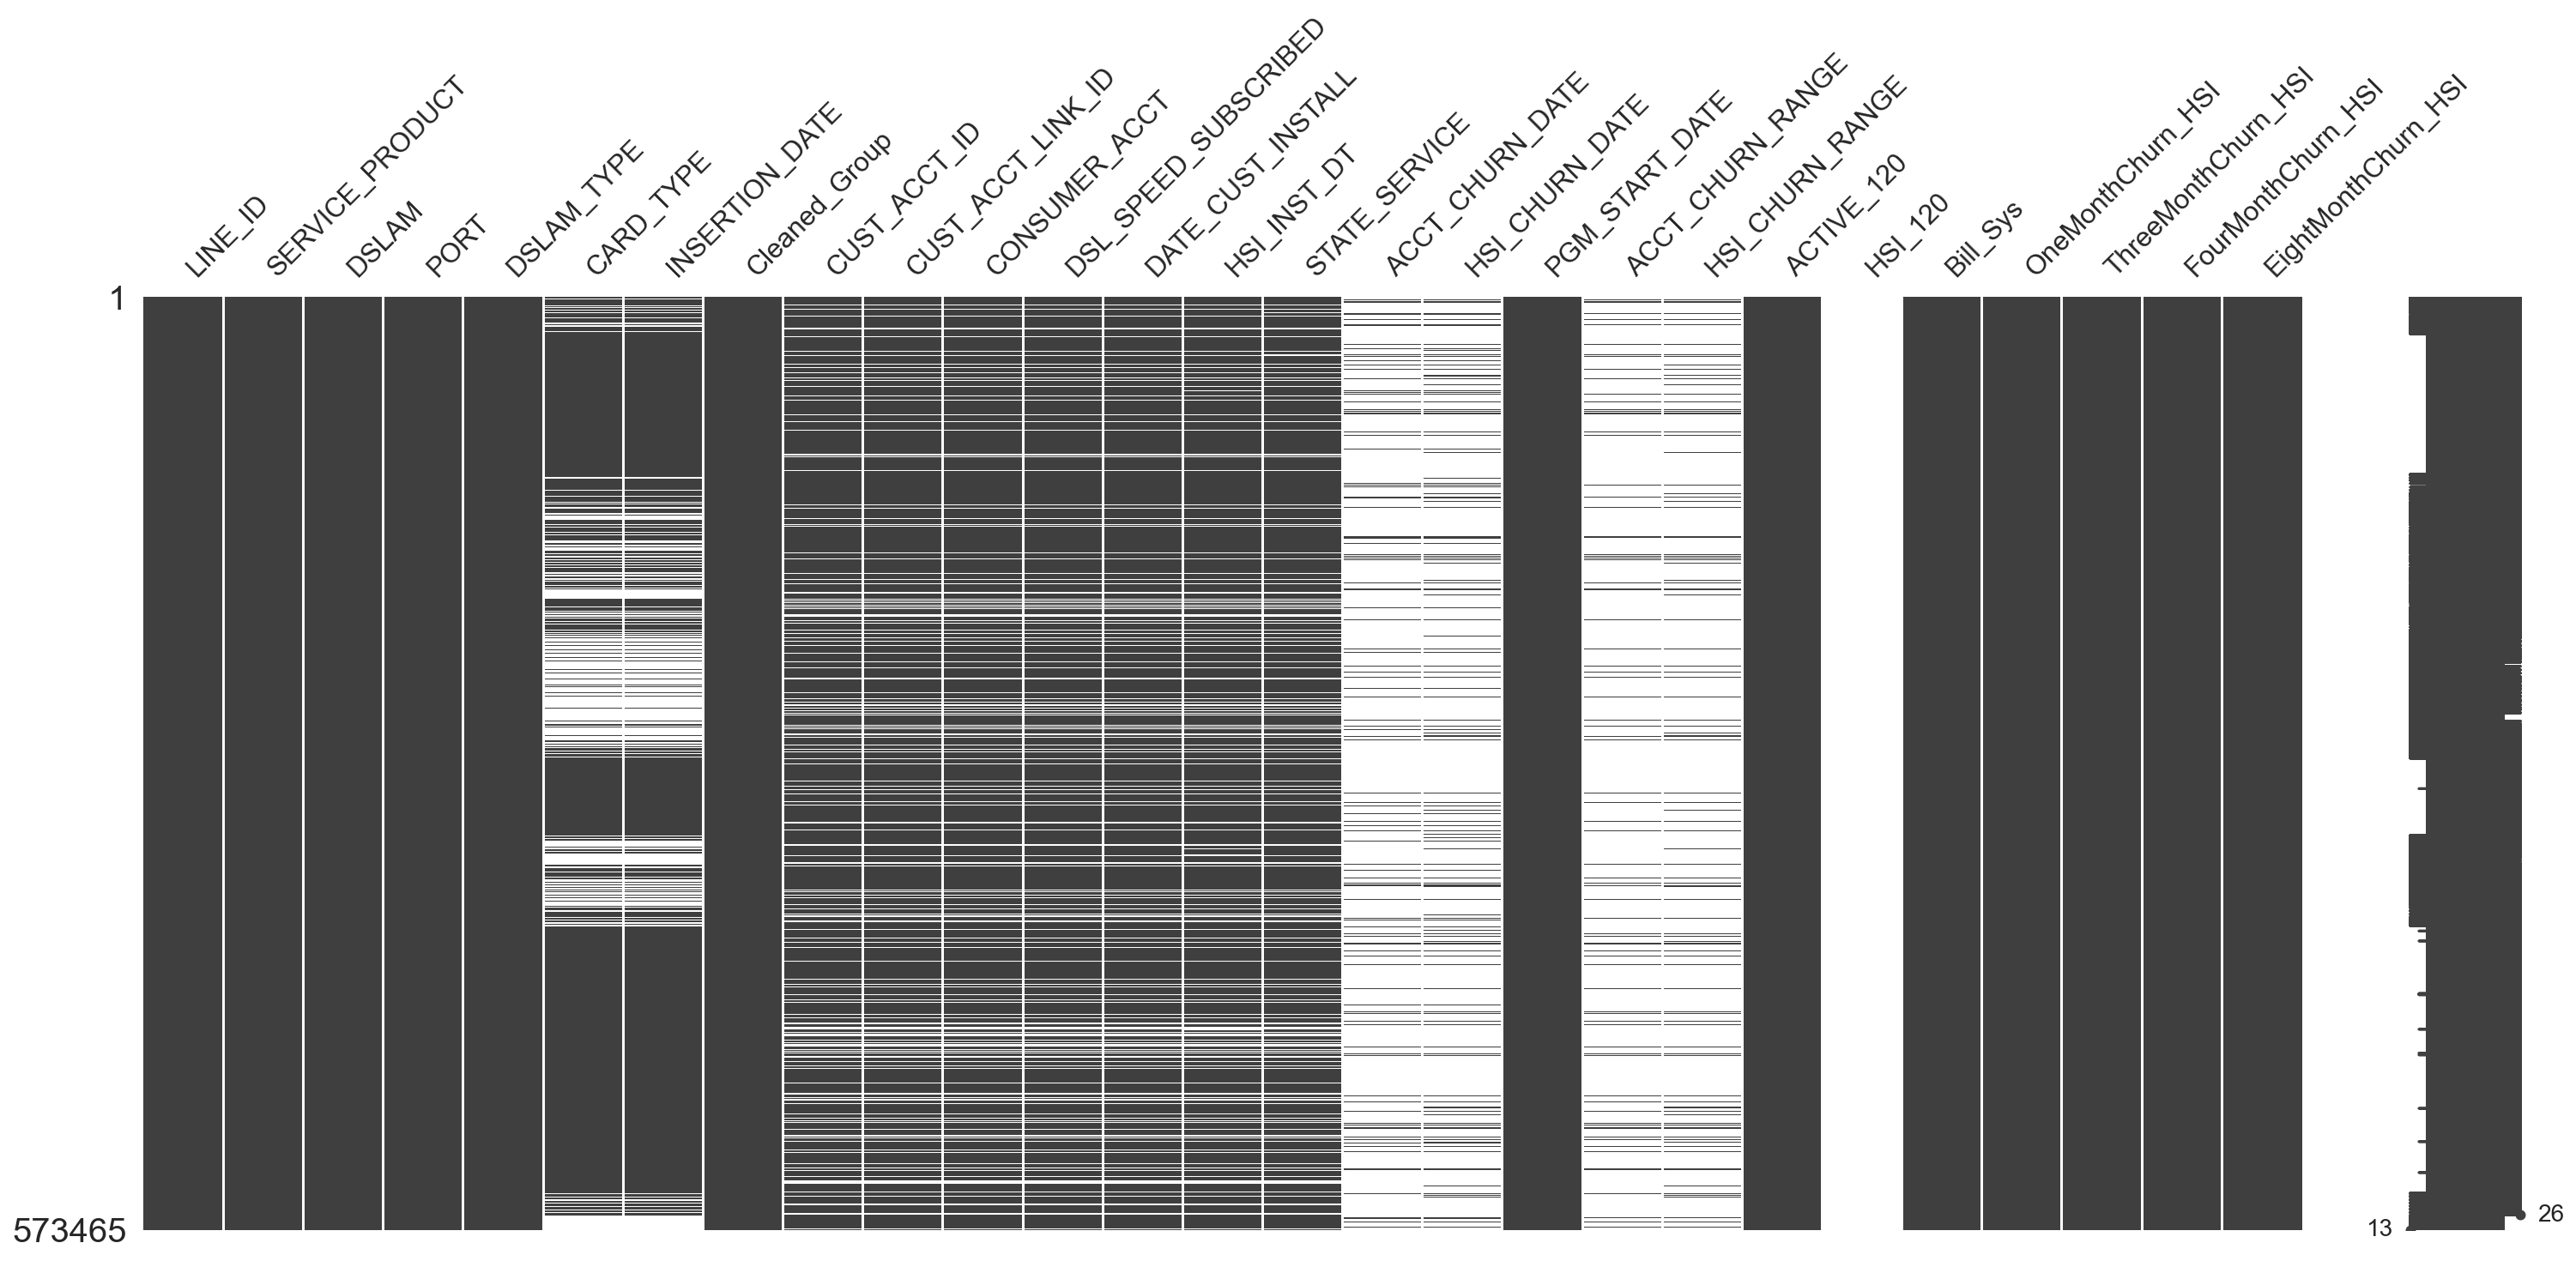

In [6]:
df.isnull().sum()
msno.matrix(df)

### Filter df to include study columns 


In [7]:
# Filter to include study columns 

#Key independent variables are: Cleaned_Group, Bill_Sys
#Key dependent variables are: OneMonthChurn_HSI, ThreeMonthChurn_HSI, FourMonthChurn_HSI, EightMonthChurn_HSI

df_v1 = df[['Cleaned_Group', 'Bill_Sys', 'OneMonthChurn_HSI', 'ThreeMonthChurn_HSI', 'FourMonthChurn_HSI', 'EightMonthChurn_HSI']]
df_v1.shape
#df_v1.head(10)

(573465, 6)

In [8]:
df_v1.dropna(inplace=True)

In [9]:
df_v1['Cleaned_Group'].value_counts()

Adtran Treatment    243179
Calix Treatment     183620
Adtran Control      103172
Calix Control        43494
Name: Cleaned_Group, dtype: int64

### Create Conlumn for Control/Testing Group 

In [10]:
def sub_groups(row):
    if row['Cleaned_Group'] == 'Adtran Treatment':
        value='Treatment'
    elif row['Cleaned_Group'] == 'Calix Treatment':
        value='Treatment'
    elif row['Cleaned_Group'] =='Adtran Control':
        value='Control'
    else:
        value = 'Control'
    return value
    
df_v1['Groups'] = df_v1.apply(sub_groups, axis=1)
df_v1.head()

,Cleaned_Group,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,Groups
0,Adtran Control,CRS,0,0,0,0,Control
1,Adtran Control,CRS,0,0,0,0,Control
2,Adtran Control,CRS,0,0,0,0,Control
3,Adtran Control,CRS,0,0,0,0,Control
4,Adtran Control,CRS,0,0,0,0,Control


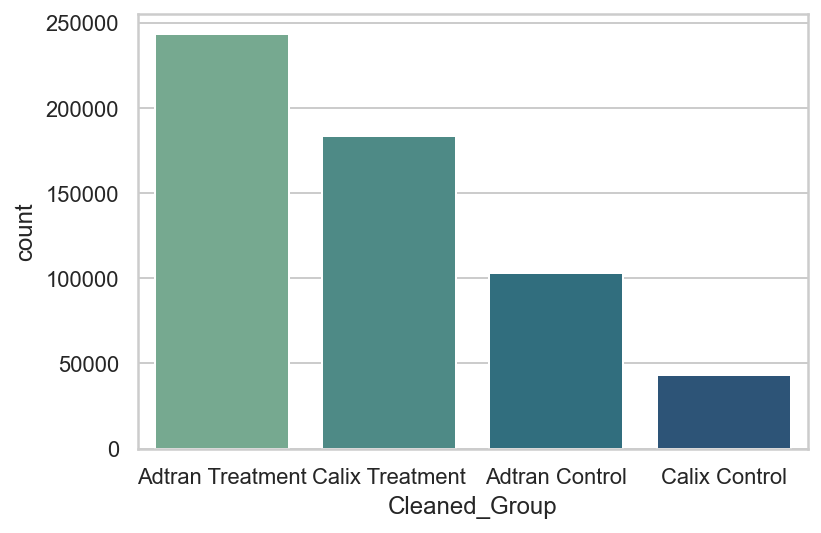

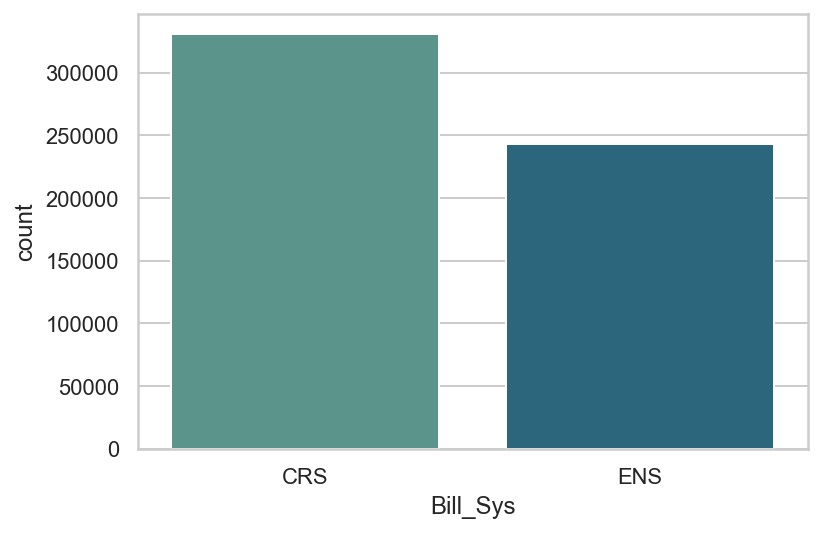

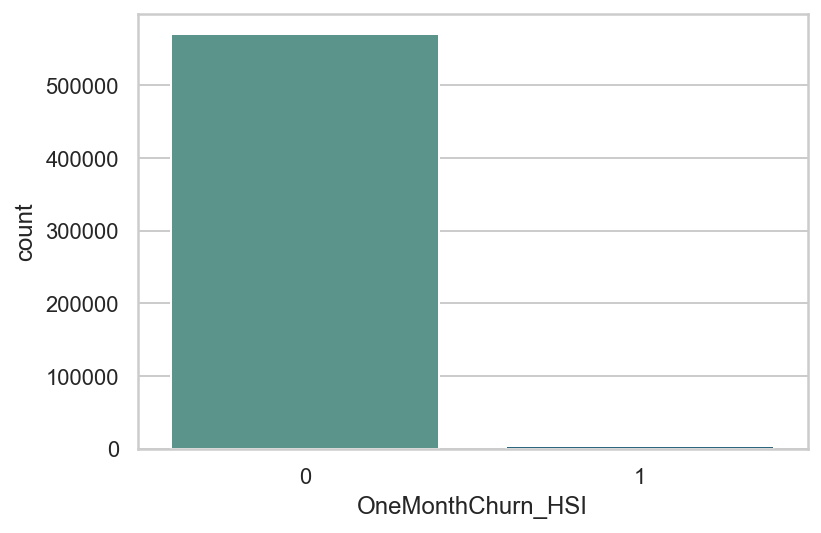

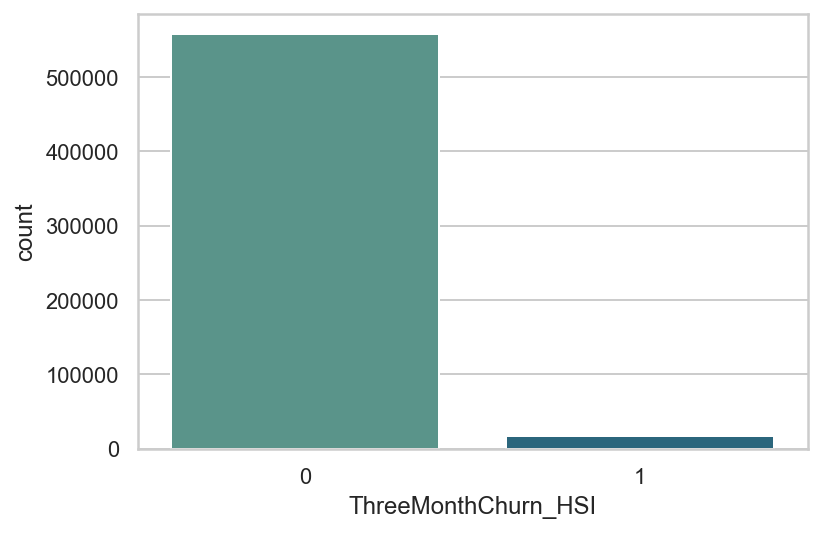

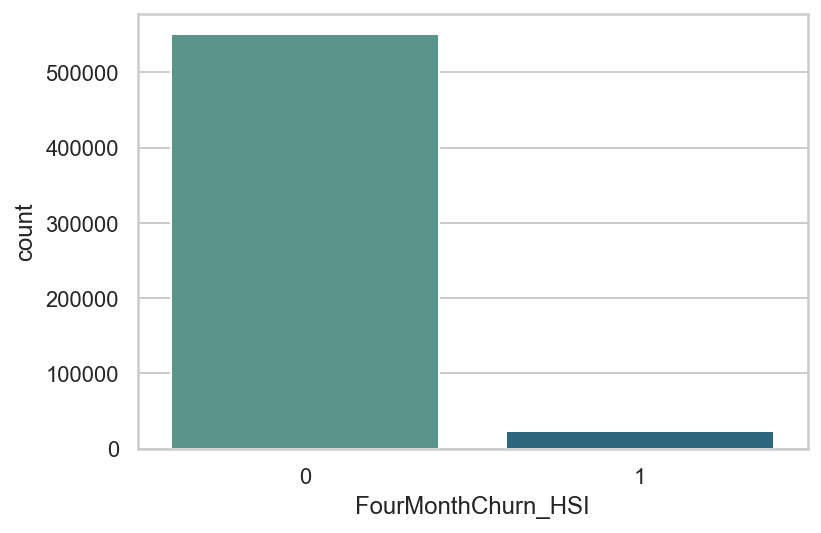

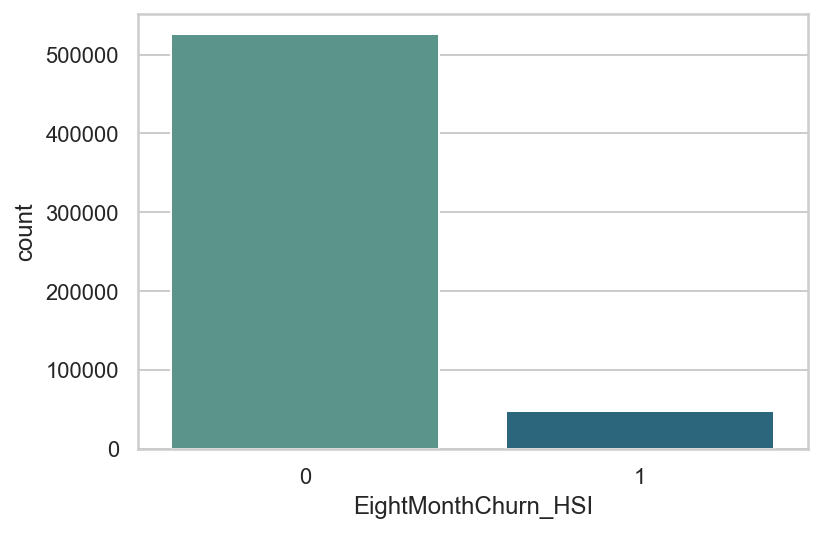

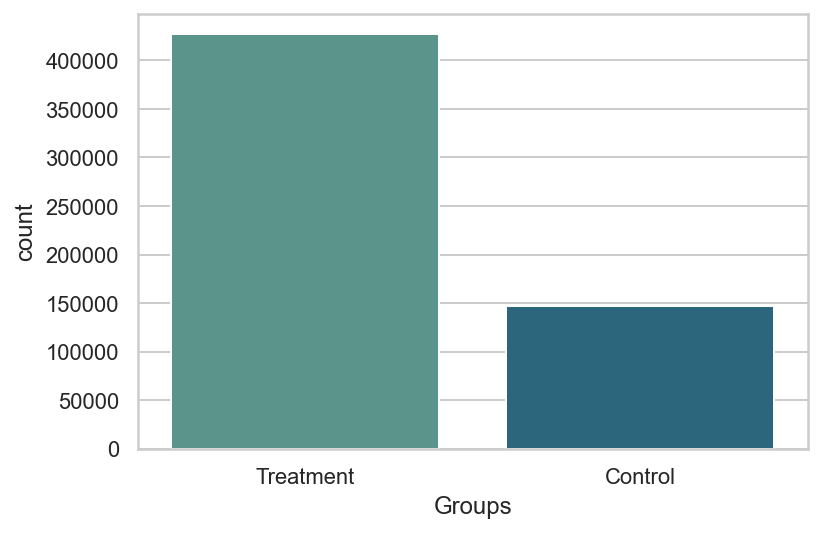

In [11]:
# Visualize Categorical Data
for col in df_v1.columns:
    ax = sns.countplot(x=col
                       , order = df_v1[col].value_counts(ascending=False).index
                       , data=df_v1
                       , palette='crest')
    plt.show()

In [12]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(df_v1)
#plt.show()

In [13]:
churnmonth_cols = ['OneMonthChurn_HSI', 'ThreeMonthChurn_HSI', 'FourMonthChurn_HSI', 'EightMonthChurn_HSI']

In [14]:
# Summary Statistics for Months_Churn 
for i in churnmonth_cols:
    print (i) 
    df_v1.groupby(["Bill_Sys","Groups"])[i].agg(["count", "mean", "median", "std"])
    print('\n\n')

OneMonthChurn_HSI


count      mean  median       std
Bill_Sys Groups                                       
CRS      Control    101921  0.011695     0.0  0.107511
         Treatment  228679  0.001793     0.0  0.042305
ENS      Control     44745  0.013566     0.0  0.115681
         Treatment  198120  0.006960     0.0  0.083139




ThreeMonthChurn_HSI


count      mean  median       std
Bill_Sys Groups                                       
CRS      Control    101921  0.035528     0.0  0.185110
         Treatment  228679  0.022914     0.0  0.149630
ENS      Control     44745  0.037233     0.0  0.189335
         Treatment  198120  0.029169     0.0  0.168281




FourMonthChurn_HSI


count      mean  median       std
Bill_Sys Groups                                       
CRS      Control    101921  0.047066     0.0  0.211781
         Treatment  228679  0.034997     0.0  0.183772
ENS      Control     44745  0.048810     0.0  0.215473
         Treatment  198120  0.040809     0.0  0.197847




EightMonthChurn_HSI


count      mean  median       std
Bill_Sys Groups                                       
CRS      Control    101921  0.085086     0.0  0.279010
         Treatment  228679  0.075328     0.0  0.263921
ENS      Control     44745  0.096190     0.0  0.294854
         Treatment  198120  0.089491     0.0  0.285452

In [15]:
# Summary Statistics for Months_Churn 
for i in churnmonth_cols:
    print (i) 
    df_v1.groupby(["Bill_Sys","Cleaned_Group", "Groups"])[i].agg(["count", "mean", "median", "std"])
    print('\n\n')

OneMonthChurn_HSI


count      mean  median       std
Bill_Sys Cleaned_Group    Groups                                       
CRS      Adtran Control   Control     96717  0.011684     0.0  0.107458
         Adtran Treatment Treatment  216628  0.001302     0.0  0.036057
         Calix Control    Control      5204  0.011914     0.0  0.108509
         Calix Treatment  Treatment   12051  0.010622     0.0  0.102516
ENS      Adtran Control   Control      6455  0.011464     0.0  0.106463
         Adtran Treatment Treatment   26551  0.002938     0.0  0.054122
         Calix Control    Control     38290  0.013920     0.0  0.117161
         Calix Treatment  Treatment  171569  0.007583     0.0  0.086750




ThreeMonthChurn_HSI


count      mean  median       std
Bill_Sys Cleaned_Group    Groups                                       
CRS      Adtran Control   Control     96717  0.035681     0.0  0.185496
         Adtran Treatment Treatment  216628  0.022366     0.0  0.147870
         Calix Control    Control      5204  0.032667     0.0  0.177781
         Calix Treatment  Treatment   12051  0.032777     0.0  0.178061
ENS      Adtran Control   Control      6455  0.037645     0.0  0.190351
         Adtran Treatment Treatment   26551  0.027532     0.0  0.163630
         Calix Control    Control     38290  0.037164     0.0  0.189165
         Calix Treatment  Treatment  171569  0.029423     0.0  0.168988




FourMonthChurn_HSI


count      mean  median       std
Bill_Sys Cleaned_Group    Groups                                       
CRS      Adtran Control   Control     96717  0.047200     0.0  0.212067
         Adtran Treatment Treatment  216628  0.034557     0.0  0.182655
         Calix Control    Control      5204  0.044581     0.0  0.206402
         Calix Treatment  Treatment   12051  0.042901     0.0  0.202642
ENS      Adtran Control   Control      6455  0.052053     0.0  0.222150
         Adtran Treatment Treatment   26551  0.041241     0.0  0.198852
         Calix Control    Control     38290  0.048263     0.0  0.214325
         Calix Treatment  Treatment  171569  0.040742     0.0  0.197692




EightMonthChurn_HSI


count      mean  median       std
Bill_Sys Cleaned_Group    Groups                                       
CRS      Adtran Control   Control     96717  0.085021     0.0  0.278915
         Adtran Treatment Treatment  216628  0.074949     0.0  0.263309
         Calix Control    Control      5204  0.086280     0.0  0.280804
         Calix Treatment  Treatment   12051  0.082151     0.0  0.274606
ENS      Adtran Control   Control      6455  0.096050     0.0  0.294682
         Adtran Treatment Treatment   26551  0.087680     0.0  0.282835
         Calix Control    Control     38290  0.096213     0.0  0.294887
         Calix Treatment  Treatment  171569  0.089771     0.0  0.285855

##### Notes:
**** Avg churn rate has increased over time despite churn rate has decreased with treatment than control group 

# Churn Performance by Bill_Sys & Groups

In [16]:
# Churn Rate 

def churn_rate(control, treament): 

    # calculate churn % between treatment and control
    churn = ((treament - control) / treament)
    
    return str(round(churn*100, 0)) + '%'

# CRS

In [17]:
df_CRS = df_v1[df_v1['Bill_Sys'] == 'CRS']
df_CRS.shape

(330600, 7)

In [18]:
df_CRS['Groups'].value_counts()

Treatment    228679
Control      101921
Name: Groups, dtype: int64

In [19]:
df_CRS.head()
df_CRS.columns

,Cleaned_Group,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,Groups
0,Adtran Control,CRS,0,0,0,0,Control
1,Adtran Control,CRS,0,0,0,0,Control
2,Adtran Control,CRS,0,0,0,0,Control
3,Adtran Control,CRS,0,0,0,0,Control
4,Adtran Control,CRS,0,0,0,0,Control


Index(['Cleaned_Group', 'Bill_Sys', 'OneMonthChurn_HSI', 'ThreeMonthChurn_HSI',
       'FourMonthChurn_HSI', 'EightMonthChurn_HSI', 'Groups'],
      dtype='object')

In [20]:
# Calculate Churn for control and treatment and Test Statistical Significance

for i in churnmonth_cols:
    print (i)
    # Identify Control and Treatment Group Per Months_Churn
    control = df_CRS[df_CRS['Groups'] == "Control"][i]
    treatment = df_CRS[df_CRS['Groups'] == "Treatment"][i]
    
    # Calculate total control and treatment records and total churn
    control_counts = df_CRS[df_CRS['Groups'] == 'Control'][i].count()
    treatment_counts = df_CRS[df_CRS['Groups'] == 'Treatment'][i].count()
    control_results = df_CRS[df_CRS['Groups'] == 'Control'][i].sum()
    treatment_results = df_CRS[df_CRS['Groups'] == 'Treatment'][i].sum()  
    print(f'total control churn :  {control_counts, control_results}')
    print(f'total treatment churn :  {treatment_counts, treatment_results}')
    
    # Calculate churn rate between control and treatment per Months_Churn
    control_churn = round((control_results /control_counts)*100,2) 
    treatment_churn = round((treatment_results / treatment_counts)*100,2)
    print('CRS Control Churn Rate :' , control_churn, '%')
    print('CRS Treatment Churn Rate :',  treatment_churn,'%')
    print('CRS Churn Rate % : ', churn_rate(control_churn, treatment_churn))
    
    # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.)
    # If Normal Distribution, check homogeneity of variances
    #perform Shapiro-Wilk test
    nt_control = shapiro(df_CRS[df_CRS['Groups'] == 'Control'][i])[1] < 0.05 # 0 - test statistic, 1 - pvalues
    nt_treatment = shapiro(df_CRS[df_CRS['Groups'] == 'Treatment'][i])[1]< 0.05

    print('ShapiroResult Control : ', nt_control)
    print('ShapiroResult Treament : ', nt_treatment)
    # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
    # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
    
    # Since the distribution is not normal, we should use Non-Parametric Test
    # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
    # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
    results = stats.mannwhitneyu(control, treatment)[1] 
    print('U test p-value', results)
    
    # Try using Parametric Test to compare with the U test results above
    # First to test the assumption -- Homogeneity of variances using Levene's Test 
    leveneTest_results = stats.levene(control, treatment)[1] < 0.05
    # H0: The variances are equal between control and treatment -- Homogeneity: False
    # H1: The variances are not equal between control and treatment -- Heterogeneous: True
    print('Levene Variance test p-value:', leveneTest_results)
    # The results is showing not equal variances -- Heterogeneous
    ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
    print('T test p-value', ttest,'\n\n')
    
    # Create dataframe for better reading
    #table_results = pd.DataFrame({
     #   "U test p -value":[results], 
     #   "Levene's Variance test p-value":[leveneTest_results],
     #   "T test p-value":[ttest]        
    #})
    #print(table_results, '\n\n')

OneMonthChurn_HSI
total control churn :  (101921, 1192)
total treatment churn :  (228679, 410)
CRS Control Churn Rate : 1.17 %
CRS Treatment Churn Rate : 0.18 %
CRS Churn Rate % :  -550.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.0
Levene Variance test p-value: True
T test p-value 2.642083436022874e-177 


ThreeMonthChurn_HSI
total control churn :  (101921, 3621)
total treatment churn :  (228679, 5240)
CRS Control Churn Rate : 3.55 %
CRS Treatment Churn Rate : 2.29 %
CRS Churn Rate % :  -55.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.6299167728727153e-95
Levene Variance test p-value: True
T test p-value 1.335845979351776e-81 


FourMonthChurn_HSI
total control churn :  (101921, 4797)
total treatment churn :  (228679, 8003)
CRS Control Churn Rate : 4.71 %
CRS Treatment Churn Rate : 3.5 %
CRS Churn Rate % :  -35.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 5.813337091012074e-62
Lev

# ENS

In [21]:
df_ENS = df_v1[df_v1['Bill_Sys'] == 'ENS']
df_ENS.shape

(242865, 7)

In [22]:
df_ENS['Groups'].value_counts()

Treatment    198120
Control       44745
Name: Groups, dtype: int64

In [23]:
# Calculate Churn for control and treatment and Test Statistical Significance

for i in churnmonth_cols:
    print (i)
    # Identify Control and Treatment Group Per Months_Churn
    control = df_ENS[df_ENS['Groups'] == "Control"][i]
    treatment = df_ENS[df_ENS['Groups'] == "Treatment"][i]
    
    # Calculate total control and treatment records and total churn
    control_counts = df_ENS[df_ENS['Groups'] == 'Control'][i].count()
    treatment_counts = df_ENS[df_ENS['Groups'] == 'Treatment'][i].count()
    control_results = df_ENS[df_ENS['Groups'] == 'Control'][i].sum()
    treatment_results = df_ENS[df_ENS['Groups'] == 'Treatment'][i].sum()  
    print(f'total control churn :  {control_counts, control_results}')
    print(f'total treatment churn :  {treatment_counts, treatment_results}')
    
    # Calculate churn rate between control and treatment per Months_Churn
    control_churn = round((control_results /control_counts)*100,2) 
    treatment_churn = round((treatment_results / treatment_counts)*100,2)
    print('ENS Control Churn Rate :' , control_churn,'%')
    print('ENS Treatment Churn Rate :',  treatment_churn,'%')
    print('ENS Churn Rate % : ', churn_rate(control_churn, treatment_churn))
    
    # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.)
    # If Normal Distribution, check homogeneity of variances
    nt_control = shapiro(df_ENS[df_ENS['Groups'] == 'Control'][i])[1] < 0.05 # 0 - test statistic, 1 - pvalues
    nt_treatment = shapiro(df_ENS[df_ENS['Groups'] == 'Treatment'][i])[1]< 0.05

    print('ShapiroResult Control : ', nt_control)
    print('ShapiroResult Treament: ', nt_treatment)
    # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
    # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
    
    # Since the distribution is not normal, we should use Non-Parametric Test
    # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
    # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
    results = stats.mannwhitneyu(control, treatment)[1] 
    print('U test p-value', results)
    
    # Try using Parametric Test to compare with the U test results above
    # First to test the assumption -- Homogeneity of variances using Levene's Test 
    leveneTest_results = stats.levene(control, treatment)[1] < 0.05
    # H0: The variances are equal between control and treatment -- Homogeneity: False
    # H1: The variances are not equal between control and treatment -- Heterogeneous: True
    print('Levene Variance test p-value:', leveneTest_results)
    # The results is showing not equal variances -- Heterogeneous
    ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
    print('T test p-value', ttest, '\n\n')

OneMonthChurn_HSI
total control churn :  (44745, 607)
total treatment churn :  (198120, 1379)
ENS Control Churn Rate : 1.36 %
ENS Treatment Churn Rate : 0.7 %
ENS Churn Rate % :  -94.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 1.3024587071444994e-44
Levene Variance test p-value: True
T test p-value 3.200070287508789e-30 


ThreeMonthChurn_HSI
total control churn :  (44745, 1666)
total treatment churn :  (198120, 5779)
ENS Control Churn Rate : 3.72 %
ENS Treatment Churn Rate : 2.92 %
ENS Churn Rate % :  -27.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 3.9811108695609723e-19
Levene Variance test p-value: True
T test p-value 1.067641457551575e-16 


FourMonthChurn_HSI
total control churn :  (44745, 2184)
total treatment churn :  (198120, 8085)
ENS Control Churn Rate : 4.88 %
ENS Treatment Churn Rate : 4.08 %
ENS Churn Rate % :  -20.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 3.042065103849

# Churn Performance by Bill_Sys, Products & Groups

# CRS & Adtran

In [24]:
df_CRS.head()
df_CRS['Cleaned_Group'].value_counts()

,Cleaned_Group,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,Groups
0,Adtran Control,CRS,0,0,0,0,Control
1,Adtran Control,CRS,0,0,0,0,Control
2,Adtran Control,CRS,0,0,0,0,Control
3,Adtran Control,CRS,0,0,0,0,Control
4,Adtran Control,CRS,0,0,0,0,Control


Adtran Treatment    216628
Adtran Control       96717
Calix Treatment      12051
Calix Control         5204
Name: Cleaned_Group, dtype: int64

In [25]:
# Calculate Churn for control and treatment and Test Statistical Significance

for i in churnmonth_cols:
    print (i)
    # Identify Control and Treatment Group Per Months_Churn
    control = df_CRS[df_CRS['Cleaned_Group'] == "Adtran Control"][i]
    treatment = df_CRS[df_CRS['Cleaned_Group'] == "Adtran Treatment"][i]
    
    # Calculate total control and treatment records and total churn
    control_counts = df_CRS[df_CRS['Cleaned_Group'] == 'Adtran Control'][i].count()
    treatment_counts = df_CRS[df_CRS['Cleaned_Group'] == 'Adtran Treatment'][i].count()
    control_results = df_CRS[df_CRS['Cleaned_Group'] == 'Adtran Control'][i].sum()
    treatment_results = df_CRS[df_CRS['Cleaned_Group'] == 'Adtran Treatment'][i].sum()  
    print(f'total control churn :  {control_counts, control_results}')
    print(f'total treatment churn :  {treatment_counts, treatment_results}')
    
    # Calculate churn rate between control and treatment per Months_Churn
    control_churn = round((control_results /control_counts)*100,2) 
    treatment_churn = round((treatment_results / treatment_counts)*100,2)
    print('CRS Adtran Control Churn Rate :' , control_churn,'%')
    print('CRS Adtran Treatment Churn Rate :',  treatment_churn,'%')
    print('CRS Adtran Churn Rate % : ', churn_rate(control_churn, treatment_churn))
    
    # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.)
    # If Normal Distribution, check homogeneity of variances
    nt_control = shapiro(df_CRS[df_CRS['Cleaned_Group'] == 'Adtran Control'][i])[1] < 0.05 # 0 - test statistic, 1 - pvalues
    nt_treatment = shapiro(df_CRS[df_CRS['Cleaned_Group'] == 'Adtran Treatment'][i])[1]< 0.05

    print('ShapiroResult Control : ', nt_control)
    print('ShapiroResult Treament: ', nt_treatment)
    # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
    # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
    
    # Since the distribution is not normal, we should use Non-Parametric Test
    # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
    # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
    results = stats.mannwhitneyu(control, treatment)[1] 
    print('U test p-value', results)
    
    # Try using Parametric Test to compare with the U test results above
    # First to test the assumption -- Homogeneity of variances using Levene's Test 
    leveneTest_results = stats.levene(control, treatment)[1] < 0.05
    # H0: The variances are equal between control and treatment -- Homogeneity: False
    # H1: The variances are not equal between control and treatment -- Heterogeneous: True
    print('Levene Variance test p-value:', leveneTest_results)
    # The results is showing not equal variances -- Heterogeneous
    ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
    print('T test p-value', ttest, '\n\n')

OneMonthChurn_HSI
total control churn :  (96717, 1130)
total treatment churn :  (216628, 282)
CRS Adtran Control Churn Rate : 1.17 %
CRS Adtran Treatment Churn Rate : 0.13 %
CRS Adtran Churn Rate % :  -800.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 0.0
Levene Variance test p-value: True
T test p-value 3.430479275054418e-188 


ThreeMonthChurn_HSI
total control churn :  (96717, 3451)
total treatment churn :  (216628, 4845)
CRS Adtran Control Churn Rate : 3.57 %
CRS Adtran Treatment Churn Rate : 2.24 %
CRS Adtran Churn Rate % :  -59.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 4.850545450534444e-102
Levene Variance test p-value: True
T test p-value 2.5481038156916756e-86 


FourMonthChurn_HSI
total control churn :  (96717, 4565)
total treatment churn :  (216628, 7486)
CRS Adtran Control Churn Rate : 4.72 %
CRS Adtran Treatment Churn Rate : 3.46 %
CRS Adtran Churn Rate % :  -36.0%
ShapiroResult Control :  True
ShapiroResu

# CRS & Calix

In [26]:
# Calculate Churn for control and treatment and Test Statistical Significance

for i in churnmonth_cols:
    print (i)
    # Identify Control and Treatment Group Per Months_Churn
    control = df_CRS[df_CRS['Cleaned_Group'] == "Calix Control"][i]
    treatment = df_CRS[df_CRS['Cleaned_Group'] == "Calix Treatment"][i]
    
    # Calculate total control and treatment records and total churn
    control_counts = df_CRS[df_CRS['Cleaned_Group'] == 'Calix Control'][i].count()
    treatment_counts = df_CRS[df_CRS['Cleaned_Group'] == 'Calix Treatment'][i].count()
    control_results = df_CRS[df_CRS['Cleaned_Group'] == 'Calix Control'][i].sum()
    treatment_results = df_CRS[df_CRS['Cleaned_Group'] == 'Calix Treatment'][i].sum()  
    print(f'total control churn :  {control_counts, control_results}')
    print(f'total treatment churn :  {treatment_counts, treatment_results}')
    
    # Calculate churn rate between control and treatment per Months_Churn
    control_churn = round((control_results /control_counts)*100,2) 
    treatment_churn = round((treatment_results / treatment_counts)*100,2)
    print('CRS Calix Control Churn Rate :' , control_churn,'%')
    print('CRS Calix Treatment Churn Rate :',  treatment_churn,'%')
    print('CRS CCalix hurn Rate % : ', churn_rate(control_churn, treatment_churn))
    
    # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.)
    # If Normal Distribution, check homogeneity of variances
    nt_control = shapiro(df_CRS[df_CRS['Cleaned_Group'] == 'Calix Control'][i])[1] < 0.05 # 0 - test statistic, 1 - pvalues
    nt_treatment = shapiro(df_CRS[df_CRS['Cleaned_Group'] == 'Calix Treatment'][i])[1]< 0.05

    print('ShapiroResult Control : ', nt_control)
    print('ShapiroResult Treament: ', nt_treatment)
    # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
    # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
    
    # Since the distribution is not normal, we should use Non-Parametric Test
    # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
    # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
    results = stats.mannwhitneyu(control, treatment)[1] 
    print('U test p-value', results)
    
    # Try using Parametric Test to compare with the U test results above
    # First to test the assumption -- Homogeneity of variances using Levene's Test 
    leveneTest_results = stats.levene(control, treatment)[1] < 0.05
    # H0: The variances are equal between control and treatment -- Homogeneity: False
    # H1: The variances are not equal between control and treatment -- Heterogeneous: True
    print('Levene Variance test p-value:', leveneTest_results)
    # The results is showing equal variances -- Homogeneity
    ttest = stats.ttest_ind(control, treatment, equal_var=True)[1]
    print('T test p-value', ttest, '\n\n')

OneMonthChurn_HSI
total control churn :  (5204, 62)
total treatment churn :  (12051, 128)
CRS Calix Control Churn Rate : 1.19 %
CRS Calix Treatment Churn Rate : 1.06 %
CRS CCalix hurn Rate % :  -12.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 0.45531082173182924
Levene Variance test p-value: False
T test p-value 0.4553212149155855 


ThreeMonthChurn_HSI
total control churn :  (5204, 170)
total treatment churn :  (12051, 395)
CRS Calix Control Churn Rate : 3.27 %
CRS Calix Treatment Churn Rate : 3.28 %
CRS CCalix hurn Rate % :  0.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 0.9702308266825217
Levene Variance test p-value: False
T test p-value 0.9702278129493954 


FourMonthChurn_HSI
total control churn :  (5204, 232)
total treatment churn :  (12051, 517)
CRS Calix Control Churn Rate : 4.46 %
CRS Calix Treatment Churn Rate : 4.29 %
CRS CCalix hurn Rate % :  -4.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True


# ENS & Adtran

In [27]:
df_ENS.head()
df_ENS['Cleaned_Group'].value_counts()

,Cleaned_Group,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,Groups
330600,Adtran Treatment,ENS,0,0,0,0,Treatment
330601,Adtran Treatment,ENS,0,0,0,0,Treatment
330602,Adtran Treatment,ENS,0,0,0,0,Treatment
330603,Adtran Treatment,ENS,0,0,0,0,Treatment
330604,Adtran Treatment,ENS,0,0,0,0,Treatment


Calix Treatment     171569
Calix Control        38290
Adtran Treatment     26551
Adtran Control        6455
Name: Cleaned_Group, dtype: int64

In [28]:
# Calculate Churn for control and treatment and Test Statistical Significance

for i in churnmonth_cols:
    print (i)
    # Identify Control and Treatment Group Per Months_Churn
    control = df_ENS[df_ENS['Cleaned_Group'] == "Adtran Control"][i]
    treatment = df_ENS[df_ENS['Cleaned_Group'] == "Adtran Treatment"][i]
    
    # Calculate total control and treatment records and total churn
    control_counts = df_ENS[df_ENS['Cleaned_Group'] == 'Adtran Control'][i].count()
    treatment_counts = df_ENS[df_ENS['Cleaned_Group'] == 'Adtran Treatment'][i].count()
    control_results = df_ENS[df_ENS['Cleaned_Group'] == 'Adtran Control'][i].sum()
    treatment_results = df_ENS[df_ENS['Cleaned_Group'] == 'Adtran Treatment'][i].sum()  
    print(f'total control churn :  {control_counts, control_results}')
    print(f'total treatment churn :  {treatment_counts, treatment_results}')
    
    # Calculate churn rate between control and treatment per Months_Churn
    control_churn = round((control_results /control_counts)*100,2) 
    treatment_churn = round((treatment_results / treatment_counts)*100,2)
    print('ENS Adtran Control Churn Rate :' , control_churn,'%')
    print('ENS Adtran Treatment Churn Rate :',  treatment_churn,'%')
    print('ENS Adtran Churn Rate % : ', churn_rate(control_churn, treatment_churn))
    
    # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.)
    # If Normal Distribution, check homogeneity of variances
    nt_control = shapiro(df_ENS[df_ENS['Cleaned_Group'] == 'Adtran Control'][i])[1] < 0.05 # 0 - test statistic, 1 - pvalues
    nt_treatment = shapiro(df_ENS[df_ENS['Cleaned_Group'] == 'Adtran Treatment'][i])[1]< 0.05

    print('ShapiroResult Control : ', nt_control)
    print('ShapiroResult Treament: ', nt_treatment)
    # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
    # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
    
    # Since the distribution is not normal, we should use Non-Parametric Test
    # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
    # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
    results = stats.mannwhitneyu(control, treatment)[1] 
    print('U test p-value', results)
    
    # Try using Parametric Test to compare with the U test results above
    # First to test the assumption -- Homogeneity of variances using Levene's Test 
    leveneTest_results = stats.levene(control, treatment)[1] < 0.05
    # H0: The variances are equal between control and treatment -- Homogeneity: False
    # H1: The variances are not equal between control and treatment -- Heterogeneous: True
    print('Levene Variance test p-value:', leveneTest_results)
    # The results is showing not equal variances -- Heterogeneous
    ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
    print('T test p-value', ttest, '\n\n')

OneMonthChurn_HSI
total control churn :  (6455, 74)
total treatment churn :  (26551, 78)
ENS Adtran Control Churn Rate : 1.15 %
ENS Adtran Treatment Churn Rate : 0.29 %
ENS Adtran Churn Rate % :  -297.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 1.1426613984363677e-19
Levene Variance test p-value: True
T test p-value 4.582359365128929e-10 


ThreeMonthChurn_HSI
total control churn :  (6455, 243)
total treatment churn :  (26551, 731)
ENS Adtran Control Churn Rate : 3.76 %
ENS Adtran Treatment Churn Rate : 2.75 %
ENS Adtran Churn Rate % :  -37.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 1.6603766981214576e-05
Levene Variance test p-value: True
T test p-value 8.553653375215158e-05 


FourMonthChurn_HSI
total control churn :  (6455, 336)
total treatment churn :  (26551, 1095)
ENS Adtran Control Churn Rate : 5.21 %
ENS Adtran Treatment Churn Rate : 4.12 %
ENS Adtran Churn Rate % :  -26.0%
ShapiroResult Control :  True
Shapir

# ENS & Calix

In [29]:
# Calculate Churn for control and treatment and Test Statistical Significance

for i in churnmonth_cols:
    print (i)
    # Identify Control and Treatment Group Per Months_Churn
    control = df_ENS[df_ENS['Cleaned_Group'] == "Calix Control"][i]
    treatment = df_ENS[df_ENS['Cleaned_Group'] == "Calix Treatment"][i]
    
    # Calculate total control and treatment records and total churn
    control_counts = df_ENS[df_ENS['Cleaned_Group'] == 'Calix Control'][i].count()
    treatment_counts = df_ENS[df_ENS['Cleaned_Group'] == 'Calix Treatment'][i].count()
    control_results = df_ENS[df_ENS['Cleaned_Group'] == 'Calix Control'][i].sum()
    treatment_results = df_ENS[df_ENS['Cleaned_Group'] == 'Calix Treatment'][i].sum()  
    print(f'total control churn :  {control_counts, control_results}')
    print(f'total treatment churn :  {treatment_counts, treatment_results}')
    
    # Calculate churn rate between control and treatment per Months_Churn
    control_churn = round((control_results /control_counts)*100,2) 
    treatment_churn = round((treatment_results / treatment_counts)*100,2)
    print('ENS Calix Control Churn Rate :' , control_churn,'%')
    print('ENS Calix Treatment Churn Rate :',  treatment_churn,'%')
    print('ENS Calix Churn Rate % : ', churn_rate(control_churn, treatment_churn))
    
    # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.)
    # If Normal Distribution, check homogeneity of variances
    nt_control = shapiro(df_ENS[df_ENS['Cleaned_Group'] == 'Calix Control'][i])[1] < 0.05 # 0 - test statistic, 1 - pvalues 
    nt_treatment = shapiro(df_ENS[df_ENS['Cleaned_Group'] == 'Calix Treatment'][i])[1]< 0.05

    print('ShapiroResult Control : ', nt_control)
    print('ShapiroResult Treament: ', nt_treatment)
    # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
    # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
    
    # Since the distribution is not normal, we should use Non-Parametric Test
    # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
    # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
    results = stats.mannwhitneyu(control, treatment)[1] 
    print('U test p-value', results)
    
    # Try using Parametric Test to compare with the U test results above
    # First to test the assumption -- Homogeneity of variances using Levene's Test 
    leveneTest_results = stats.levene(control, treatment)[1] < 0.05
    # H0: The variances are equal between control and treatment -- Homogeneity: False
    # H1: The variances are not equal between control and treatment -- Heterogeneous: True
    print('Levene Variance test p-value:', leveneTest_results)
    # The results is showing not equal variances -- Heterogeneous
    ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
    print('T test p-value', ttest, '\n\n')

OneMonthChurn_HSI
total control churn :  (38290, 533)
total treatment churn :  (171569, 1301)
ENS Calix Control Churn Rate : 1.39 %
ENS Calix Treatment Churn Rate : 0.76 %
ENS Calix Churn Rate % :  -83.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 2.024259726326891e-33
Levene Variance test p-value: True
T test p-value 1.7680220308278314e-23 


ThreeMonthChurn_HSI
total control churn :  (38290, 1423)
total treatment churn :  (171569, 5048)
ENS Calix Control Churn Rate : 3.72 %
ENS Calix Treatment Churn Rate : 2.94 %
ENS Calix Churn Rate % :  -27.0%
ShapiroResult Control :  True
ShapiroResult Treament:  True
U test p-value 2.3204117515313954e-15
Levene Variance test p-value: True
T test p-value 1.6349960446844578e-13 


FourMonthChurn_HSI
total control churn :  (38290, 1848)
total treatment churn :  (171569, 6990)
ENS Calix Control Churn Rate : 4.83 %
ENS Calix Treatment Churn Rate : 4.07 %
ENS Calix Churn Rate % :  -19.0%
ShapiroResult Control :  True
Sha

# Function - Churn Performance by Bill_Sys & Groups

In [33]:
group_cols = ['Control', 'Treatment']
group_cols[0]

'Control'

In [35]:
churnmonth_cols = ['OneMonthChurn_HSI', 'ThreeMonthChurn_HSI', 'FourMonthChurn_HSI', 'EightMonthChurn_HSI']
churnmonth_cols[0]

'OneMonthChurn_HSI'

# Function - V1

In [115]:
# Functions for running statistical testing

def ControlTreatmentTesting(dataframe, df_groups_col, df_groups_split_value, df_months_churn):
        
    """
    Functions for calculating Churn for Control and Treatment and Test Statistical Significance
    """
    
    for df_months_churn in churnmonth_cols:
        print (df_months_churn)
        
        # Identify Control and Treatment Group Per Months_Churn
        control = dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn]
        treatment = dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn]
        
        # Calculate total control and treatment records and total churn
        control_counts = dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn].count()
        treatment_counts = dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn].count()
        control_results = dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn].sum()
        treatment_results = dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn].sum()  
        print(f'total control churn :  {control_counts, control_results}')
        print(f'total treatment churn :  {treatment_counts, treatment_results}')
        
        # Calculate churn rate between control and treatment per Months_Churn
        control_churn = round((control_results /control_counts)*100,2) 
        treatment_churn = round((treatment_results / treatment_counts)*100,2)
        print('Control Churn Rate :' , control_churn, '%')
        print('Treatment Churn Rate :',  treatment_churn,'%')
        print('Churn Rate % : ', churn_rate(control_churn, treatment_churn))
        
        # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.
        # If Normal Distribution, check homogeneity of variances
        #perform Shapiro-Wilk test
        nt_control = shapiro(dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn])[1] < 0.05 # 0 - test statistic, 1 - pvalues
        nt_treatment = shapiro(dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn])[1] < 0.05
        print('ShapiroResult Control : ', nt_control)
        print('ShapiroResult Treament : ', nt_treatment)
        # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
        # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
        
        # Since the distribution is not normal, we should use Non-Parametric Test
        # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
        # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
        u_test_results = stats.mannwhitneyu(control, treatment)[1] 
        print('U test p-value', u_test_results)
        
        # Try using Parametric Test to compare with the U test results above
        # First to test the assumption -- Homogeneity of variances using Levene's Test 
        leveneTest_results = stats.levene(control, treatment)[1] < 0.05
        # H0: The variances are equal between control and treatment -- Homogeneity: False
        # H1: The variances are not equal between control and treatment -- Heterogeneous: True
        print('Levene Variance test p-value:', leveneTest_results)
        # The results is showing not equal variances -- Heterogeneous
        ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
        print('T test p-value', ttest)
        
        
        # Try using Parametric Test to compare with the U test results above 
        # Use Z Proportion Tests (%) --z-test 95% CI 
        n_control = control_counts
        n_result = treatment_counts
        successes = [control_results, treatment_results]
        nobs = [n_control, n_result]
        
        z_stat, pval = proportions_ztest(successes, nobs=nobs)
        (lower_off, lower_on), (upper_off, upper_on) = proportion_confint(successes, nobs=nobs, alpha=0.05)
        print(f'Z statistic: {z_stat:.2f}')
        print(f'Z Proportion test p-value: {pval:.3f}','\n\n')
        #print(f'Z Proportion test ci 95% for control group: [{lower_off:.3f}, {upper_off:.3f}]')
        #print(f'Z Proportion test ci 95% for treatment group: [{lower_on:.3f}, {upper_on:.3f}]','\n\n')
    
        # Create dataframe for better reading
        #table_results = pd.DataFrame({
        #   "U test p -value":[results], 
        #   "Levene's Variance test p-value":[leveneTest_results],
        #   "T test p-value":[ttest]        
        #})
        #print(table_results, '\n\n')

# Function - V2

In [114]:
# Functions for running statistical testing

def New_ControlTreatmentTesting(dataframe, df_groups_col, df_groups_split_value, df_months_churn):
        
    """
    Functions for calculating Churn for Control and Treatment and Test Statistical Significance
    """
    
    for df_months_churn in churnmonth_cols:
        print (df_months_churn)
        
        # Identify Control and Treatment Group Per Months_Churn
        control = dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn]
        treatment = dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn]
        
        # Calculate total control and treatment records and total churn
        control_counts = dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn].count()
        treatment_counts = dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn].count()
        control_results = dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn].sum()
        treatment_results = dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn].sum()  
        print(f'total control churn :  {control_counts, control_results}')
        print(f'total treatment churn :  {treatment_counts, treatment_results}')
        
        # Calculate churn rate between control and treatment per Months_Churn
        control_churn = round((control_results /control_counts)*100,2) 
        treatment_churn = round((treatment_results / treatment_counts)*100,2)
        print('Control Churn Rate :' , control_churn, '%')
        print('Treatment Churn Rate :',  treatment_churn,'%')
        print('Churn Rate % : ', churn_rate(control_churn, treatment_churn))
        
        # Test for Statistical Significance: first check for normality using Shapiro-Wilk Test (calculates whether a random sample of data comes from a normal distribution, When the p-value is less than or equal to 0.05 (assuming a 95% confidence level) the data is not normal.
        # If Normal Distribution, then check homogeneity of variances
        #perform Shapiro-Wilk test
        nt_control = shapiro(dataframe[dataframe[df_groups_col] == df_groups_split_value[0]][df_months_churn])[1] < 0.05 # 0 - test statistic, 1 - pvalues
        nt_treatment = shapiro(dataframe[dataframe[df_groups_col] == df_groups_split_value[1]][df_months_churn])[1] < 0.05
        print('ShapiroResult Control : ', nt_control)
        print('ShapiroResult Treament : ', nt_treatment)
        # H0: There is no statistically significant difference between the sample distribution and normal distribution, meanining Distribution is Normal! - False 
        # H1: There is a statistically significant difference between the sample distribution and normal distribution, meanining Distribution is not Normal! - True
        
        if (nt_control == False) & (nt_treatment == False): # "H0: Normal Distribution"

        # The distribution is normal, try using Parametric Test to compare with the U test results above
        # First to test the assumption -- Homogeneity of variances using Levene's Test 
            leveneTest_results = stats.levene(control, treatment)[1] < 0.05
            print('Levene Variance test p-value:', leveneTest_results)     
        # H0: The variances are equal between control and treatment -- Homogeneity: False
        # H1: The variances are not equal between control and treatment -- Heterogeneous: True
            
            if leveneTest_results == False:
                # The results is showing equal variances -- Homogeneity
                equalvar_ttest = stats.ttest_ind(control, treatment, equal_var=True)[1]
                print('T test with Equal Variance p-value', equalvar_ttest) 
                # H0: M1 == M2 - False
                # H1: M1 != M2 - True
            
            else:
                # The results is showing not equal variances -- Heterogeneous
                unequalvar_ttest = stats.ttest_ind(control, treatment, equal_var=False)[1]
                print('T test with Unequal Variance p-value', unequalvar_ttest) 
                # H0: M1 == M2 - False
                # H1: M1 != M2 - True        
        
        else:
            # Since the distribution is not normal, we should use Non-Parametric Test
            # H0: The distribution of the values between control and treament are equal -- M1 == M2 - False
            # H1: The distribution of the values between control and treament are not equal -- M1 != M2 - True
            u_test_results = stats.mannwhitneyu(control, treatment)[1]
            print('U test p-value', u_test_results)
        
        # Try using Parametric Test to compare with the U test results above 
        # Use Z Proportion Tests (%) --z-test 95% CI 
        n_control = control_counts
        n_result = treatment_counts
        successes = [control_results, treatment_results]
        nobs = [n_control, n_result]
        
        z_stat, pval = proportions_ztest(successes, nobs=nobs)
        (lower_off, lower_on), (upper_off, upper_on) = proportion_confint(successes, nobs=nobs, alpha=0.05)
        print(f'Z statistic: {z_stat:.2f}')
        print(f'Z Proportion test p-value: {pval:.3f}','\n\n')
        #print(f'Z Proportion test ci 95% for control group: [{lower_off:.3f}, {upper_off:.3f}]')
        #print(f'Z Proportion test ci 95% for treatment group: [{lower_on:.3f}, {upper_on:.3f}]','\n\n')

# CRS

In [85]:
ControlTreatmentTesting(dataframe = df_CRS, df_groups_col = 'Groups', df_groups_split_value=group_cols, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (101921, 1192)
total treatment churn :  (228679, 410)
Control Churn Rate : 1.17 %
Treatment Churn Rate : 0.18 %
Churn Rate % :  -550.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.0
Levene Variance test p-value: True
T test p-value 2.642083436022874e-177
Z statistic: 37.86
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (101921, 3621)
total treatment churn :  (228679, 5240)
Control Churn Rate : 3.55 %
Treatment Churn Rate : 2.29 %
Churn Rate % :  -55.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.6299167728727153e-95
Levene Variance test p-value: True
T test p-value 1.335845979351776e-81
Z statistic: 20.74
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (101921, 4797)
total treatment churn :  (228679, 8003)
Control Churn Rate : 4.71 %
Treatment Churn Rate : 3.5 %
Churn Rate % :  -35.0%
ShapiroResult Control :  True
Sha

In [111]:
New_ControlTreatmentTesting(dataframe = df_CRS, df_groups_col = 'Groups', df_groups_split_value=group_cols, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (101921, 1192)
total treatment churn :  (228679, 410)
Control Churn Rate : 1.17 %
Treatment Churn Rate : 0.18 %
Churn Rate % :  -550.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.0
Z statistic: 37.86
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (101921, 3621)
total treatment churn :  (228679, 5240)
Control Churn Rate : 3.55 %
Treatment Churn Rate : 2.29 %
Churn Rate % :  -55.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.6299167728727153e-95
Z statistic: 20.74
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (101921, 4797)
total treatment churn :  (228679, 8003)
Control Churn Rate : 4.71 %
Treatment Churn Rate : 3.5 %
Churn Rate % :  -35.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 5.813337091012074e-62
Z statistic: 16.61
Z Proportion test p-value: 0.000 


EightMonthChurn_HSI
total

# ENS

In [57]:
ControlTreatmentTesting(dataframe = df_ENS, df_groups_col = 'Groups', df_groups_split_value=group_cols, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (44745, 607)
total treatment churn :  (198120, 1379)
Control Churn Rate : 1.36 %
Treatment Churn Rate : 0.7 %
Churn Rate % :  -94.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.3024587071444994e-44
Levene Variance test p-value: True
T test p-value 3.200070287508789e-30
Z statistic: 14.01
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (44745, 1666)
total treatment churn :  (198120, 5779)
Control Churn Rate : 3.72 %
Treatment Churn Rate : 2.92 %
Churn Rate % :  -27.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 3.9811108695609723e-19
Levene Variance test p-value: True
T test p-value 1.067641457551575e-16
Z statistic: 8.94
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (44745, 2184)
total treatment churn :  (198120, 8085)
Control Churn Rate : 4.88 %
Treatment Churn Rate : 4.08 %
Churn Rate % :  -20.0%
ShapiroResult Contro

In [98]:
New_ControlTreatmentTesting(dataframe = df_ENS, df_groups_col = 'Groups', df_groups_split_value=group_cols, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (44745, 607)
total treatment churn :  (198120, 1379)
Control Churn Rate : 1.36 %
Treatment Churn Rate : 0.7 %
Churn Rate % :  -94.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.3024587071444994e-44
Z statistic: 14.01
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (44745, 1666)
total treatment churn :  (198120, 5779)
Control Churn Rate : 3.72 %
Treatment Churn Rate : 2.92 %
Churn Rate % :  -27.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 3.9811108695609723e-19
Z statistic: 8.94
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (44745, 2184)
total treatment churn :  (198120, 8085)
Control Churn Rate : 4.88 %
Treatment Churn Rate : 4.08 %
Churn Rate % :  -20.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 3.042065103849148e-14
Z statistic: 7.60
Z Proportion test p-value: 0.000 


EightMonthCh

# Function - Churn Performance by Bill_Sys, Products & Groups

In [58]:
adtran_groups= ['Adtran Control', 'Adtran Treatment']
adtran_groups[0]

'Adtran Control'

In [59]:
calix_groups = ['Calix Control', 'Calix Treatment']
calix_groups[0]

'Calix Control'

# CRS & Adtran

In [60]:
ControlTreatmentTesting(dataframe = df_CRS, df_groups_col = 'Cleaned_Group', df_groups_split_value=adtran_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (96717, 1130)
total treatment churn :  (216628, 282)
Control Churn Rate : 1.17 %
Treatment Churn Rate : 0.13 %
Churn Rate % :  -800.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.0
Levene Variance test p-value: True
T test p-value 3.430479275054418e-188
Z statistic: 40.08
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (96717, 3451)
total treatment churn :  (216628, 4845)
Control Churn Rate : 3.57 %
Treatment Churn Rate : 2.24 %
Churn Rate % :  -59.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 4.850545450534444e-102
Levene Variance test p-value: True
T test p-value 2.5481038156916756e-86
Z statistic: 21.45
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (96717, 4565)
total treatment churn :  (216628, 7486)
Control Churn Rate : 4.72 %
Treatment Churn Rate : 3.46 %
Churn Rate % :  -36.0%
ShapiroResult Control :  True
Shap

In [100]:
New_ControlTreatmentTesting(dataframe = df_CRS, df_groups_col = 'Cleaned_Group', df_groups_split_value=adtran_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (96717, 1130)
total treatment churn :  (216628, 282)
Control Churn Rate : 1.17 %
Treatment Churn Rate : 0.13 %
Churn Rate % :  -800.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.0
Z statistic: 40.08
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (96717, 3451)
total treatment churn :  (216628, 4845)
Control Churn Rate : 3.57 %
Treatment Churn Rate : 2.24 %
Churn Rate % :  -59.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 4.850545450534444e-102
Z statistic: 21.45
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (96717, 4565)
total treatment churn :  (216628, 7486)
Control Churn Rate : 4.72 %
Treatment Churn Rate : 3.46 %
Churn Rate % :  -36.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 8.206764936753545e-65
Z statistic: 17.00
Z Proportion test p-value: 0.000 


EightMonthChurn_HSI
total c

# CRS & Calix

In [61]:
ControlTreatmentTesting(dataframe = df_CRS, df_groups_col = 'Cleaned_Group', df_groups_split_value=calix_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (5204, 62)
total treatment churn :  (12051, 128)
Control Churn Rate : 1.19 %
Treatment Churn Rate : 1.06 %
Churn Rate % :  -12.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.45531082173182924
Levene Variance test p-value: False
T test p-value 0.4654322081154071
Z statistic: 0.75
Z Proportion test p-value: 0.455 


ThreeMonthChurn_HSI
total control churn :  (5204, 170)
total treatment churn :  (12051, 395)
Control Churn Rate : 3.27 %
Treatment Churn Rate : 3.28 %
Churn Rate % :  0.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.9702308266825217
Levene Variance test p-value: False
T test p-value 0.9702095643038147
Z statistic: -0.04
Z Proportion test p-value: 0.970 


FourMonthChurn_HSI
total control churn :  (5204, 232)
total treatment churn :  (12051, 517)
Control Churn Rate : 4.46 %
Treatment Churn Rate : 4.29 %
Churn Rate % :  -4.0%
ShapiroResult Control :  True
ShapiroResult T

In [101]:
New_ControlTreatmentTesting(dataframe = df_CRS, df_groups_col = 'Cleaned_Group', df_groups_split_value=calix_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (5204, 62)
total treatment churn :  (12051, 128)
Control Churn Rate : 1.19 %
Treatment Churn Rate : 1.06 %
Churn Rate % :  -12.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.45531082173182924
Z statistic: 0.75
Z Proportion test p-value: 0.455 


ThreeMonthChurn_HSI
total control churn :  (5204, 170)
total treatment churn :  (12051, 395)
Control Churn Rate : 3.27 %
Treatment Churn Rate : 3.28 %
Churn Rate % :  0.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.9702308266825217
Z statistic: -0.04
Z Proportion test p-value: 0.970 


FourMonthChurn_HSI
total control churn :  (5204, 232)
total treatment churn :  (12051, 517)
Control Churn Rate : 4.46 %
Treatment Churn Rate : 4.29 %
Churn Rate % :  -4.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.6191611124658332
Z statistic: 0.50
Z Proportion test p-value: 0.619 


EightMonthChurn_HSI
total control ch

# ENS & Adtran

In [62]:
ControlTreatmentTesting(dataframe= df_ENS, df_groups_col = 'Cleaned_Group', df_groups_split_value=adtran_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (6455, 74)
total treatment churn :  (26551, 78)
Control Churn Rate : 1.15 %
Treatment Churn Rate : 0.29 %
Churn Rate % :  -297.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.1426613984363677e-19
Levene Variance test p-value: True
T test p-value 4.582359365128929e-10
Z statistic: 9.07
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (6455, 243)
total treatment churn :  (26551, 731)
Control Churn Rate : 3.76 %
Treatment Churn Rate : 2.75 %
Churn Rate % :  -37.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.6603766981214576e-05
Levene Variance test p-value: True
T test p-value 8.553653375215158e-05
Z statistic: 4.31
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (6455, 336)
total treatment churn :  (26551, 1095)
Control Churn Rate : 5.21 %
Treatment Churn Rate : 4.12 %
Churn Rate % :  -26.0%
ShapiroResult Control :  True
S

In [102]:
New_ControlTreatmentTesting(dataframe= df_ENS, df_groups_col = 'Cleaned_Group', df_groups_split_value=adtran_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (6455, 74)
total treatment churn :  (26551, 78)
Control Churn Rate : 1.15 %
Treatment Churn Rate : 0.29 %
Churn Rate % :  -297.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.1426613984363677e-19
Z statistic: 9.07
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (6455, 243)
total treatment churn :  (26551, 731)
Control Churn Rate : 3.76 %
Treatment Churn Rate : 2.75 %
Churn Rate % :  -37.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 1.6603766981214576e-05
Z statistic: 4.31
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (6455, 336)
total treatment churn :  (26551, 1095)
Control Churn Rate : 5.21 %
Treatment Churn Rate : 4.12 %
Churn Rate % :  -26.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.00013061932274460324
Z statistic: 3.83
Z Proportion test p-value: 0.000 


EightMonthChurn_HSI
to

# ENS & Calix

In [63]:
ControlTreatmentTesting(dataframe= df_ENS, df_groups_col = 'Cleaned_Group', df_groups_split_value=calix_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (38290, 533)
total treatment churn :  (171569, 1301)
Control Churn Rate : 1.39 %
Treatment Churn Rate : 0.76 %
Churn Rate % :  -83.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 2.024259726326891e-33
Levene Variance test p-value: True
T test p-value 1.7680220308278314e-23
Z statistic: 12.05
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (38290, 1423)
total treatment churn :  (171569, 5048)
Control Churn Rate : 3.72 %
Treatment Churn Rate : 2.94 %
Churn Rate % :  -27.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 2.3204117515313954e-15
Levene Variance test p-value: True
T test p-value 1.6349960446844578e-13
Z statistic: 7.92
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (38290, 1848)
total treatment churn :  (171569, 6990)
Control Churn Rate : 4.83 %
Treatment Churn Rate : 4.07 %
Churn Rate % :  -19.0%
ShapiroResult Cont

In [103]:
New_ControlTreatmentTesting(dataframe= df_ENS, df_groups_col = 'Cleaned_Group', df_groups_split_value=calix_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (38290, 533)
total treatment churn :  (171569, 1301)
Control Churn Rate : 1.39 %
Treatment Churn Rate : 0.76 %
Churn Rate % :  -83.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 2.024259726326891e-33
Z statistic: 12.05
Z Proportion test p-value: 0.000 


ThreeMonthChurn_HSI
total control churn :  (38290, 1423)
total treatment churn :  (171569, 5048)
Control Churn Rate : 3.72 %
Treatment Churn Rate : 2.94 %
Churn Rate % :  -27.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 2.3204117515313954e-15
Z statistic: 7.92
Z Proportion test p-value: 0.000 


FourMonthChurn_HSI
total control churn :  (38290, 1848)
total treatment churn :  (171569, 6990)
Control Churn Rate : 4.83 %
Treatment Churn Rate : 4.07 %
Churn Rate % :  -19.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 3.453482346586673e-11
Z statistic: 6.63
Z Proportion test p-value: 0.000 


EightMonthCh

# PB (Pair Bond) Product

In [66]:
# Read Data from SQL Servers

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=CTOMASQL1SQL2,7116;'
                      'Database=USER_DB;'
                      'Trusted_Connection=yes;')

df_pb = pd.read_sql_query('SELECT * FROM [dbo].[JJ_combined_PB_churn_analysis_August22Update_wCuts]', conn)
df_pb.head(5)

,LINE_ID,SERVICE_PRODUCT,DSLAM,DSLAM_TYPE,PORT,CARD_TYPE,PRIMARY_LINE_ID,PRIMARY_PORT,GROUP_TYPE,Cleaned_Group,CUST_ACCT_ID,CUST_ACCT_LINK_ID,CONSUMER_ACCT,DSL_SPEED_SUBSCRIBED,HSI_INST_DT,STATE_SERVICE,ACCT_CHURN_RANGE,HSI_CHURN_RANGE,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,SpeedGroup,TenureDays,TenureGroup
0,6234347611,100M_10M_BOND_V2,PHNDAZQQ_02,ADTRANTA5000-RT,2022-01-13,VDSL48P,6.234348e+09,2022-01-13,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None
1,6234347611_1,100M_10M_BOND_V2,PHNDAZQQ_02,ADTRANTA5000-RT,2023-01-13,VDSL48P,6.234348e+09,2022-01-13,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None
2,6234347618,140M_20M_BOND_VV,PHNDAZ76_02,ADTRANTA5000-RT,1931-01-02,VDSL48P,6.234348e+09,1931-01-02,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None
3,6234347618_1,140M_20M_BOND_VV,PHNDAZ76_02,ADTRANTA5000-RT,1935-01-02,VDSL48P,6.234348e+09,1931-01-02,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None
4,6234347627,80M_10M_BOND_V2,PHNDAZOF002,ADTRAN-RT,2018-01-01,1148VX Host,6.234348e+09,2018-01-01,PO,Adtran Treatment,PPB02379301,82027605.0,1.0,80000.0,2021-02-16,AZ,None,None,CRS,0,0,0,0,Faster,204.0,Less


In [67]:
df_pb.shape

(610552, 26)

In [68]:
def sub_groups(row):
    if row['Cleaned_Group'] == 'Adtran Treatment':
        value='Treatment'
    elif row['Cleaned_Group'] == 'Calix Treatment':
        value='Treatment'
    elif row['Cleaned_Group'] =='Adtran Control':
        value='Control'
    else:
        value = 'Control'
    return value
    
df_pb['Groups'] = df_pb.apply(sub_groups, axis=1)
df_pb.head()

,LINE_ID,SERVICE_PRODUCT,DSLAM,DSLAM_TYPE,PORT,CARD_TYPE,PRIMARY_LINE_ID,PRIMARY_PORT,GROUP_TYPE,Cleaned_Group,CUST_ACCT_ID,CUST_ACCT_LINK_ID,CONSUMER_ACCT,DSL_SPEED_SUBSCRIBED,HSI_INST_DT,STATE_SERVICE,ACCT_CHURN_RANGE,HSI_CHURN_RANGE,Bill_Sys,OneMonthChurn_HSI,ThreeMonthChurn_HSI,FourMonthChurn_HSI,EightMonthChurn_HSI,SpeedGroup,TenureDays,TenureGroup,Groups
0,6234347611,100M_10M_BOND_V2,PHNDAZQQ_02,ADTRANTA5000-RT,2022-01-13,VDSL48P,6.234348e+09,2022-01-13,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None,Treatment
1,6234347611_1,100M_10M_BOND_V2,PHNDAZQQ_02,ADTRANTA5000-RT,2023-01-13,VDSL48P,6.234348e+09,2022-01-13,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None,Treatment
2,6234347618,140M_20M_BOND_VV,PHNDAZ76_02,ADTRANTA5000-RT,1931-01-02,VDSL48P,6.234348e+09,1931-01-02,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None,Treatment
3,6234347618_1,140M_20M_BOND_VV,PHNDAZ76_02,ADTRANTA5000-RT,1935-01-02,VDSL48P,6.234348e+09,1931-01-02,PO,Adtran Treatment,None,NaN,NaN,NaN,NaT,None,None,None,CRS,0,0,0,0,None,NaN,None,Treatment
4,6234347627,80M_10M_BOND_V2,PHNDAZOF002,ADTRAN-RT,2018-01-01,1148VX Host,6.234348e+09,2018-01-01,PO,Adtran Treatment,PPB02379301,82027605.0,1.0,80000.0,2021-02-16,AZ,None,None,CRS,0,0,0,0,Faster,204.0,Less,Treatment


# CRS

In [73]:
df_pb_CRS = df_pb[df_pb['Bill_Sys'] == 'CRS']

In [71]:
ControlTreatmentTesting(dataframe = df_pb_CRS, df_groups_col = 'Groups', df_groups_split_value=group_cols, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (96652, 297)
total treatment churn :  (416502, 1137)
Control Churn Rate : 0.31 %
Treatment Churn Rate : 0.27 %
Churn Rate % :  -15.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.06877762773195509
Levene Variance test p-value: False
T test p-value 0.079397518644738
Z statistic: 1.82
Z Proportion test p-value: 0.069 


ThreeMonthChurn_HSI
total control churn :  (96652, 909)
total treatment churn :  (416502, 3887)
Control Churn Rate : 0.94 %
Treatment Churn Rate : 0.93 %
Churn Rate % :  -1.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.8331179603405823
Levene Variance test p-value: False
T test p-value 0.8335105048476771
Z statistic: 0.21
Z Proportion test p-value: 0.833 


FourMonthChurn_HSI
total control churn :  (96652, 1283)
total treatment churn :  (416502, 5603)
Control Churn Rate : 1.33 %
Treatment Churn Rate : 1.35 %
Churn Rate % :  1.0%
ShapiroResult Control :  True
Shapir

# ENS

In [74]:
df_pb_ENS = df_pb[df_pb['Bill_Sys'] == 'ENS']
#df_pb_ENS.head()

In [75]:
ControlTreatmentTesting(dataframe = df_pb_ENS, df_groups_col = 'Groups', df_groups_split_value=group_cols, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (20786, 116)
total treatment churn :  (76612, 384)
Control Churn Rate : 0.56 %
Treatment Churn Rate : 0.5 %
Churn Rate % :  -12.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.30914866239447036
Levene Variance test p-value: False
T test p-value 0.3239691367044151
Z statistic: 1.02
Z Proportion test p-value: 0.309 


ThreeMonthChurn_HSI
total control churn :  (20786, 407)
total treatment churn :  (76612, 1457)
Control Churn Rate : 1.96 %
Treatment Churn Rate : 1.9 %
Churn Rate % :  -3.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.5995596467483153
Levene Variance test p-value: False
T test p-value 0.6025480948501083
Z statistic: 0.53
Z Proportion test p-value: 0.600 


FourMonthChurn_HSI
total control churn :  (20786, 555)
total treatment churn :  (76612, 2129)
Control Churn Rate : 2.67 %
Treatment Churn Rate : 2.78 %
Churn Rate % :  4.0%
ShapiroResult Control :  True
ShapiroResul

# CRS & Adtran

In [78]:
ControlTreatmentTesting(dataframe= df_pb_CRS, df_groups_col = 'Cleaned_Group', df_groups_split_value=adtran_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (92920, 288)
total treatment churn :  (400214, 1097)
Control Churn Rate : 0.31 %
Treatment Churn Rate : 0.27 %
Churn Rate % :  -15.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.06291616331568664
Levene Variance test p-value: False
T test p-value 0.07342811603319596
Z statistic: 1.86
Z Proportion test p-value: 0.063 


ThreeMonthChurn_HSI
total control churn :  (92920, 875)
total treatment churn :  (400214, 3731)
Control Churn Rate : 0.94 %
Treatment Churn Rate : 0.93 %
Churn Rate % :  -1.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.7880112431092945
Levene Variance test p-value: False
T test p-value 0.7886533899476204
Z statistic: 0.27
Z Proportion test p-value: 0.788 


FourMonthChurn_HSI
total control churn :  (92920, 1235)
total treatment churn :  (400214, 5363)
Control Churn Rate : 1.33 %
Treatment Churn Rate : 1.34 %
Churn Rate % :  1.0%
ShapiroResult Control :  True
Shap

# CRS & Calix

In [76]:
ControlTreatmentTesting(dataframe = df_pb_CRS, df_groups_col = 'Cleaned_Group', df_groups_split_value=calix_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (3732, 9)
total treatment churn :  (16288, 40)
Control Churn Rate : 0.24 %
Treatment Churn Rate : 0.25 %
Churn Rate % :  4.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.9606857109029044
Levene Variance test p-value: False
T test p-value 0.960452391955757
Z statistic: -0.05
Z Proportion test p-value: 0.961 


ThreeMonthChurn_HSI
total control churn :  (3732, 34)
total treatment churn :  (16288, 156)
Control Churn Rate : 0.91 %
Treatment Churn Rate : 0.96 %
Churn Rate % :  5.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.7906163721976553
Levene Variance test p-value: False
T test p-value 0.787437308741658
Z statistic: -0.27
Z Proportion test p-value: 0.791 


FourMonthChurn_HSI
total control churn :  (3732, 48)
total treatment churn :  (16288, 240)
Control Churn Rate : 1.29 %
Treatment Churn Rate : 1.47 %
Churn Rate % :  12.0%
ShapiroResult Control :  True
ShapiroResult Treament 

# ENS & Adtran

In [79]:
ControlTreatmentTesting(dataframe= df_pb_ENS, df_groups_col = 'Cleaned_Group', df_groups_split_value=adtran_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (2682, 20)
total treatment churn :  (9752, 59)
Control Churn Rate : 0.75 %
Treatment Churn Rate : 0.61 %
Churn Rate % :  -23.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.4167053677310353
Levene Variance test p-value: False
T test p-value 0.4439348362340182
Z statistic: 0.81
Z Proportion test p-value: 0.417 


ThreeMonthChurn_HSI
total control churn :  (2682, 63)
total treatment churn :  (9752, 189)
Control Churn Rate : 2.35 %
Treatment Churn Rate : 1.94 %
Churn Rate % :  -21.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.18108569234181082
Levene Variance test p-value: False
T test p-value 0.20492121490247925
Z statistic: 1.34
Z Proportion test p-value: 0.181 


FourMonthChurn_HSI
total control churn :  (2682, 90)
total treatment churn :  (9752, 273)
Control Churn Rate : 3.36 %
Treatment Churn Rate : 2.8 %
Churn Rate % :  -20.0%
ShapiroResult Control :  True
ShapiroResult Tream

# ENS & Calix

In [83]:
ControlTreatmentTesting(dataframe = df_pb_ENS, df_groups_col = 'Cleaned_Group', df_groups_split_value=calix_groups, df_months_churn = churnmonth_cols)

OneMonthChurn_HSI
total control churn :  (18104, 96)
total treatment churn :  (66860, 325)
Control Churn Rate : 0.53 %
Treatment Churn Rate : 0.49 %
Churn Rate % :  -8.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.4526706045447585
Levene Variance test p-value: False
T test p-value 0.46383911677971756
Z statistic: 0.75
Z Proportion test p-value: 0.453 


ThreeMonthChurn_HSI
total control churn :  (18104, 344)
total treatment churn :  (66860, 1268)
Control Churn Rate : 1.9 %
Treatment Churn Rate : 1.9 %
Churn Rate % :  0.0%
ShapiroResult Control :  True
ShapiroResult Treament :  True
U test p-value 0.9746488459004813
Levene Variance test p-value: False
T test p-value 0.974662573694606
Z statistic: 0.03
Z Proportion test p-value: 0.975 


FourMonthChurn_HSI
total control churn :  (18104, 465)
total treatment churn :  (66860, 1856)
Control Churn Rate : 2.57 %
Treatment Churn Rate : 2.78 %
Churn Rate % :  8.0%
ShapiroResult Control :  True
ShapiroResult Tr